In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic-dataset.csv')

In [3]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print(df["Embarked"].head(10))

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object


In [12]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [13]:
df["Age"].isnull().sum()

np.int64(0)

In [14]:
df["Embarked"].isnull().sum()

np.int64(2)

In [15]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [16]:
df["Embarked"].isnull().sum()

np.int64(0)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [18]:
print(df["Sex"].head(5))

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [32]:
for col in df.select_dtypes(include=["int64"]).columns:
    print(col)
    stander_deviation = df[col].std()
    variance = df[col].var()
    range = df[col].max() - df[col].min()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    print("Interquartile Range :", IQR)
    print("Standard Deviation :", stander_deviation)
    print("Variance :", variance)
    print("Range :", range)


PassengerId
Interquartile Range : 445.0
Standard Deviation : 257.3538420152301
Variance : 66231.0
Range : 890
Survived
Interquartile Range : 1.0
Standard Deviation : 0.4865924542648575
Variance : 0.23677221654749742
Range : 1
Pclass
Interquartile Range : 1.0
Standard Deviation : 0.836071240977049
Variance : 0.6990151199889028
Range : 2
Sex
Interquartile Range : 1.0
Standard Deviation : 0.4779900708960981
Variance : 0.2284745078752569
Range : 1
SibSp
Interquartile Range : 1.0
Standard Deviation : 1.1027434322934317
Variance : 1.2160430774662985
Range : 8
Parch
Interquartile Range : 0.0
Standard Deviation : 0.8060572211299483
Variance : 0.6497282437357343
Range : 6


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

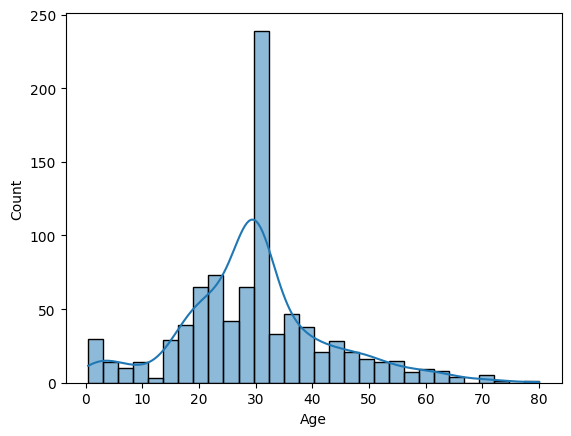

In [35]:
sns.histplot(df["Age"], kde=-True)

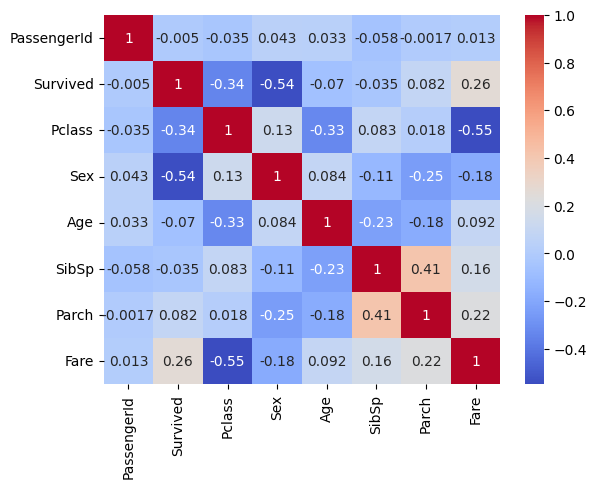

In [40]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

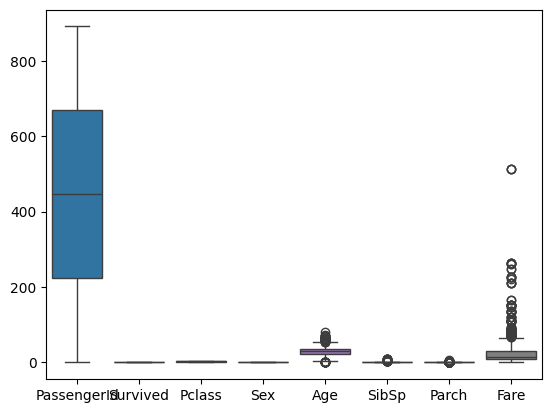

In [44]:
sns.boxplot(data=df)
plt.show()

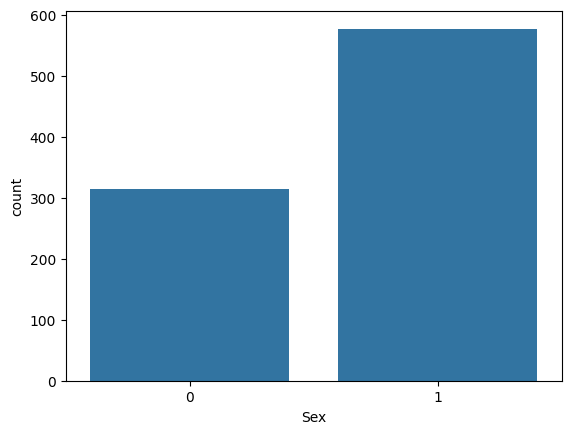

In [42]:
sns.countplot(x='Sex', data=df)
plt.show()

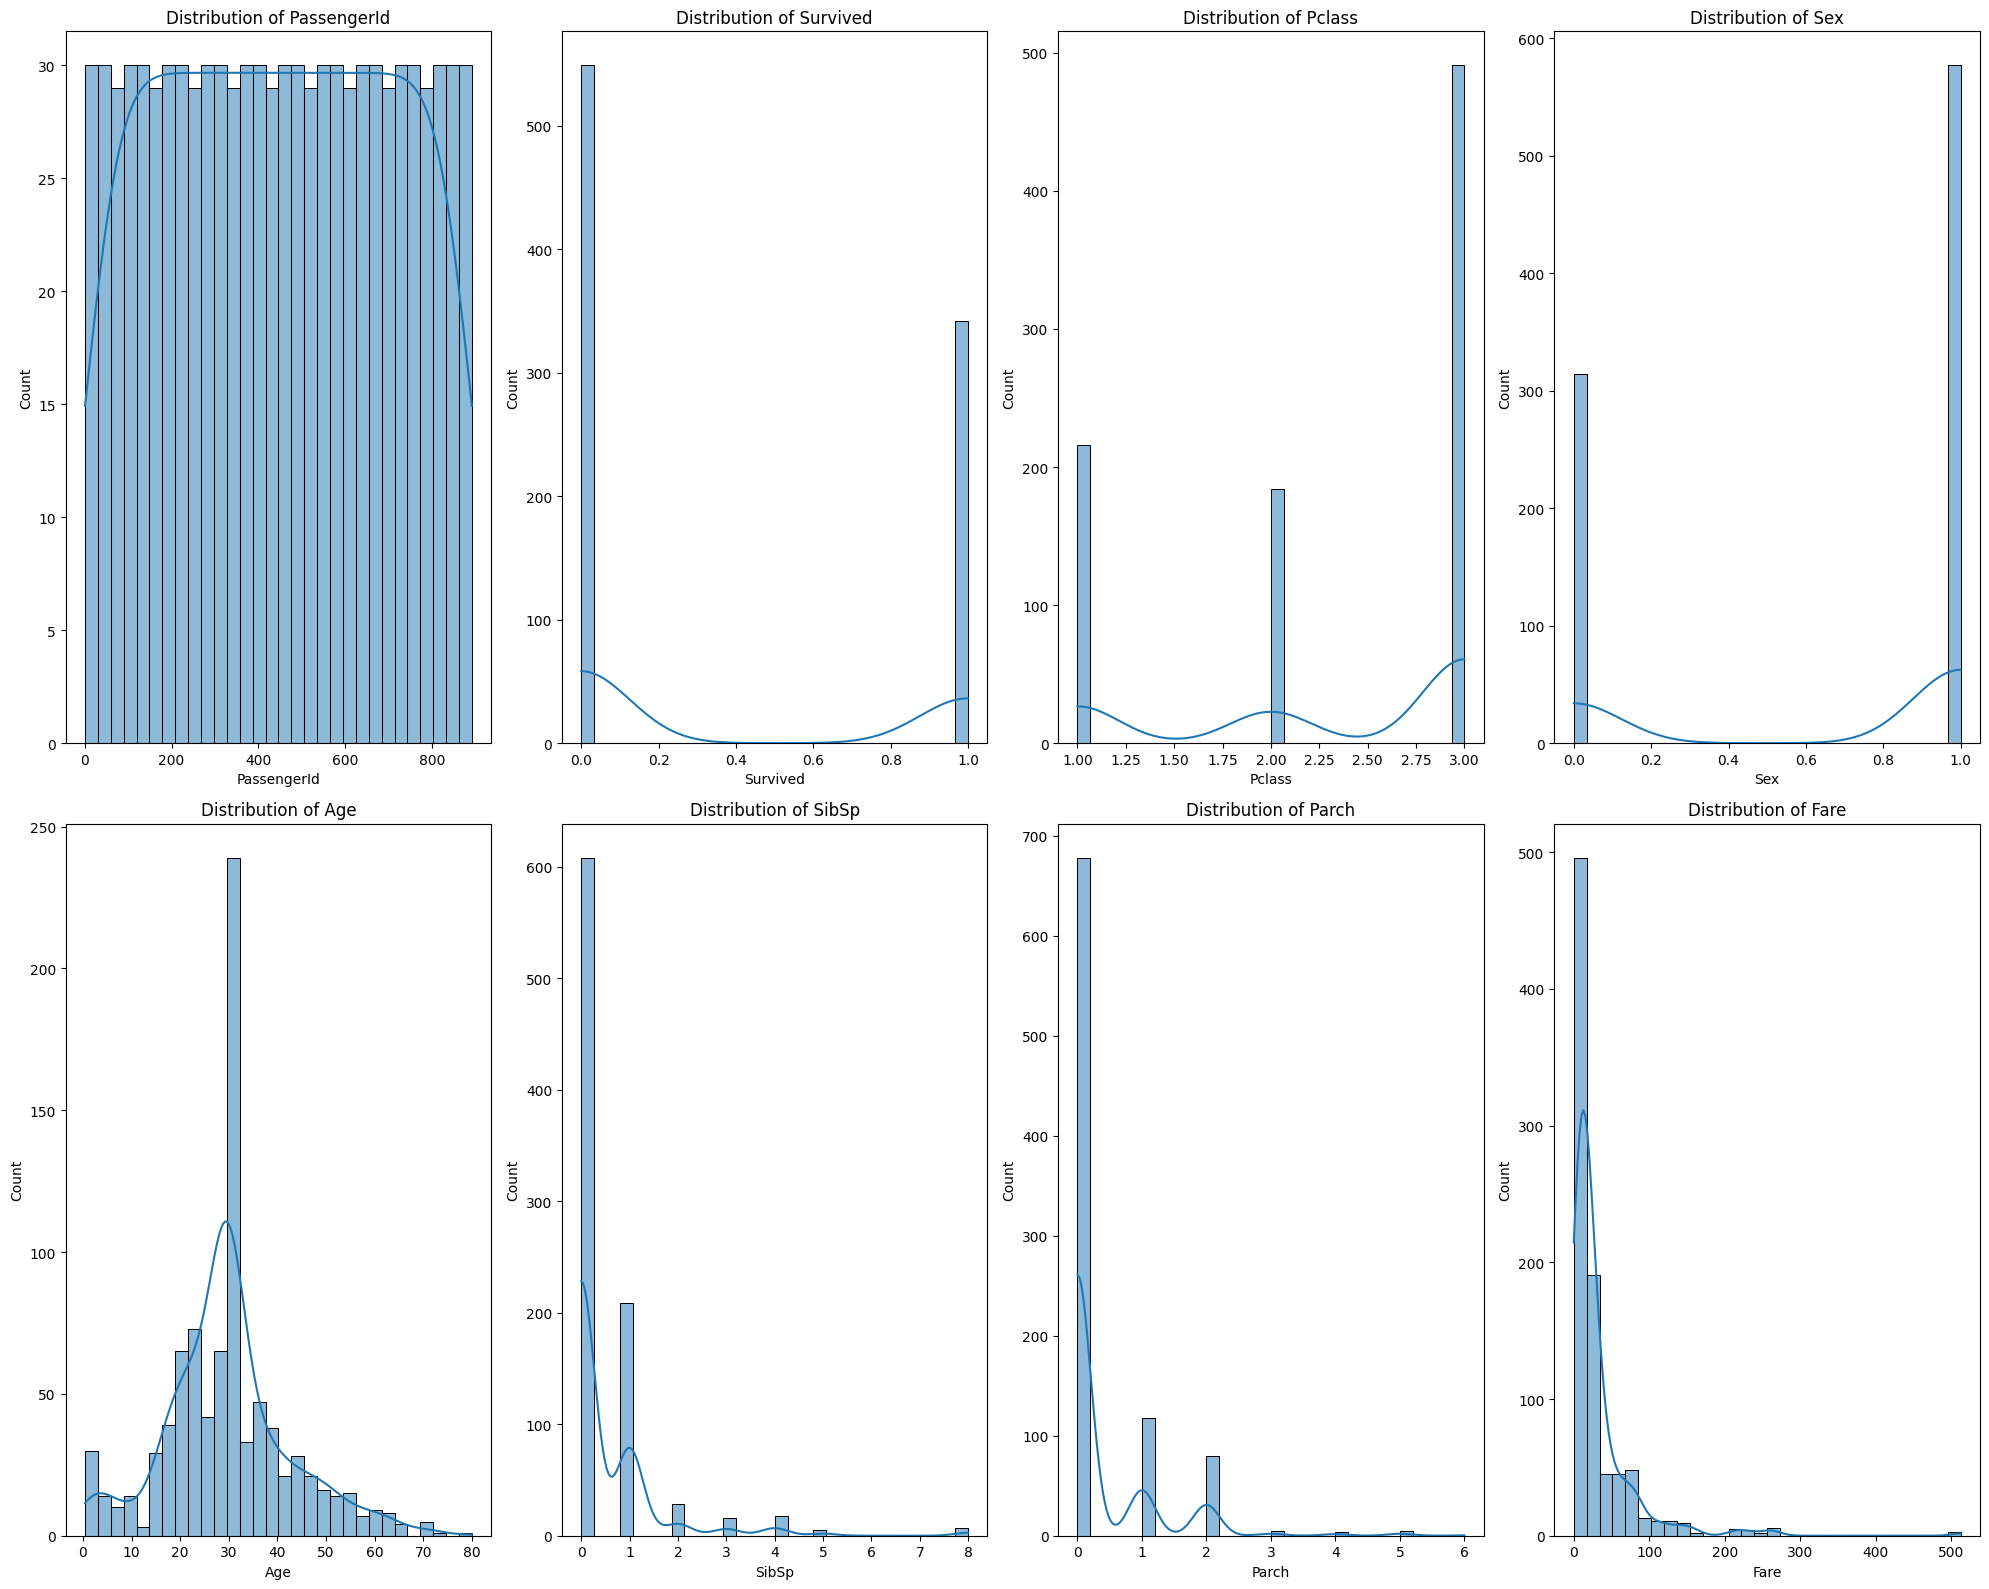

In [54]:
# Distribution analysis for all numerical columns
fig, axes = plt.subplots(2, 4, figsize=(20, 16))
axes = axes.ravel()

numerical_cols = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        # axes[i].tick_params(axis='x', rotation=45)

# # Remove empty subplots
# for i in range(len(numerical_cols), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [49]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of subplots

# x = np.linspace(0, 10, 100)

# axes[0, 0].plot(x, np.sin(x))
# axes[0, 0].set_title('Sine Wave')

# axes[0, 1].plot(x, np.cos(x))
# axes[0, 1].set_title('Cosine Wave')

# axes[1, 0].plot(x, np.tan(x))
# axes[1, 0].set_title('Tangent Wave')

# axes[1, 1].plot(x, x**2)
# axes[1, 1].set_title('Quadratic')

# plt.tight_layout()
# plt.show()
